In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [5]:
X=df.drop('math_score',axis=1)
y=df['math_score']

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
categorical_features=X.select_dtypes(include='object').columns
numerical_features=X.select_dtypes(exclude='object').columns

In [10]:
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
scaler=StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

In [12]:
preprocessor=ColumnTransformer(
    [
        ('std',scaler,numerical_features),
        ('one',oh_transformer,categorical_features)
    ],
    
)

In [13]:
X=preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 14)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [16]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    r2=r2_score(true, predicted)
    
    return mae, mse, r2
    

In [17]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoosting':GradientBoostingRegressor(),
    
    #'XGBRegressor':XGBRegressor(),

}
model_list=[]
len(list(models.values()))

8

In [18]:
for i in range(len(list(models.values()))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mae,mse,r2=evaluate_model(y_test,y_pred)
    print(model,r2)
    print('\n')



LinearRegression() 0.8804332983749564


Ridge() 0.8804513937125636


Lasso() 0.825320079562973


KNeighborsRegressor() 0.7763353420586311


DecisionTreeRegressor() 0.7277864899251413


RandomForestRegressor() 0.851920945290477


AdaBoostRegressor() 0.8477944136480954


GradientBoostingRegressor() 0.8728976271731215




**Here Linear regression is the best model**

plt.plot(y_test, y_pred)

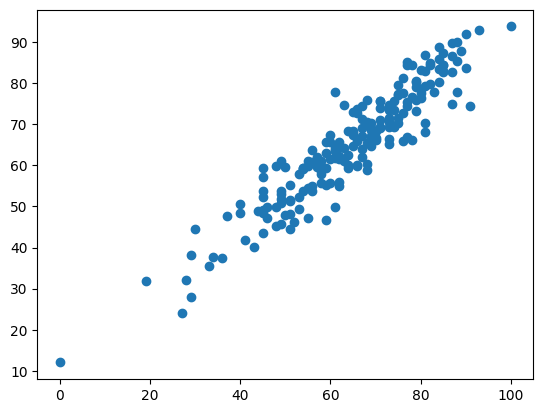

In [20]:
plt.scatter(y_test,y_pred)

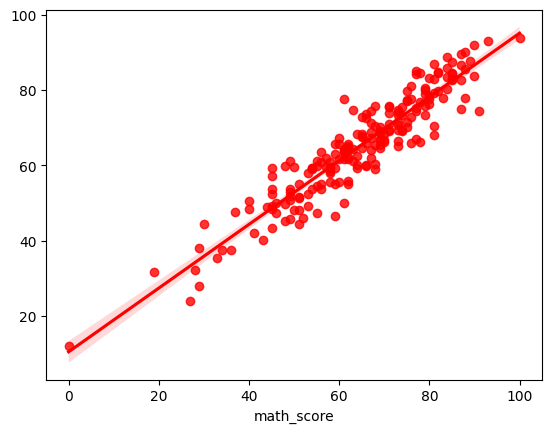

In [23]:
sns.regplot(x=y_test,y=y_pred,color ='red');

In [24]:
difference=pd.DataFrame()

In [27]:
difference['actual_value']=y_test
difference['predicted_value']=y_pred
difference['error(difference)']=difference['actual_value']-difference['predicted_value']

In [28]:
difference.head()

,actual_value,predicted_value,error(difference)
521,91,74.349514,16.650486
737,53,57.897727,-4.897727
740,80,78.560335,1.439665
660,74,75.580922,-1.580922
411,84,85.817144,-1.817144
